<a href="https://colab.research.google.com/github/Ragavi203/Predictive-Modeling-of-Fitness-Levels/blob/main/Predictive_Modeling_of_Fitness_Levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('health_fitness_dataset.csv')

# Data Preprocessing
df = df.dropna()  # Drop rows with missing values (can also use imputation)

# Encode categorical variables
df = pd.get_dummies(df, columns=['gender', 'activity_type', 'intensity'], drop_first=True)

# Feature Selection
X = df[['duration_minutes', 'age', 'hydration_level', 'daily_steps']]  # Add other features as needed
y = df['fitness_level']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 5.078529862760517


RMSE: 4.906669914211818
R2 Score: 0.20970912244287676


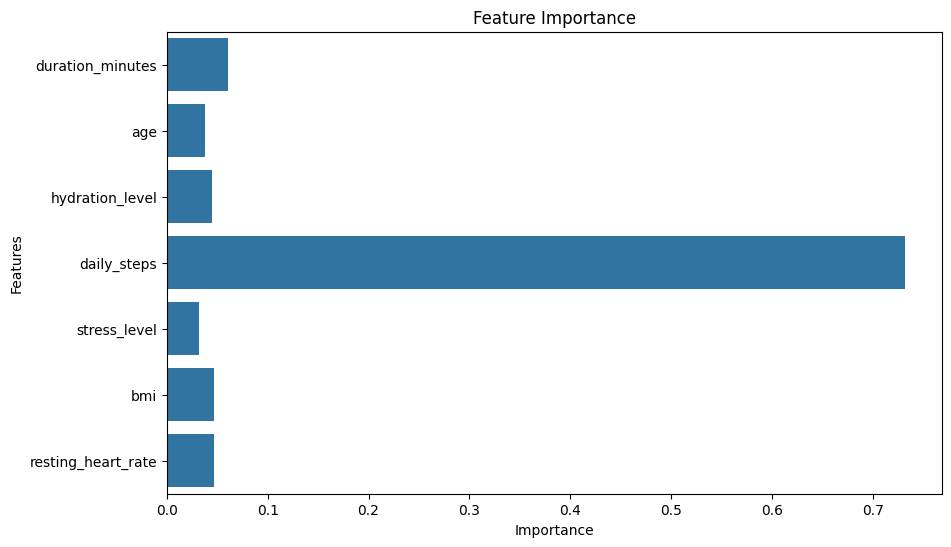

In [2]:
# Add More Features
X = df[['duration_minutes', 'age', 'hydration_level', 'daily_steps',
        'stress_level', 'bmi', 'resting_heart_rate']]  # Add other features as needed
y = df['fitness_level']

# Feature Scaling (Optional, useful for algorithms like Neural Networks or SVM)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = model.feature_importances_
features = ['duration_minutes', 'age', 'hydration_level', 'daily_steps',
            'stress_level', 'bmi', 'resting_heart_rate']

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
RMSE: 4.881309374638388
R2 Score: 0.21763667535776032


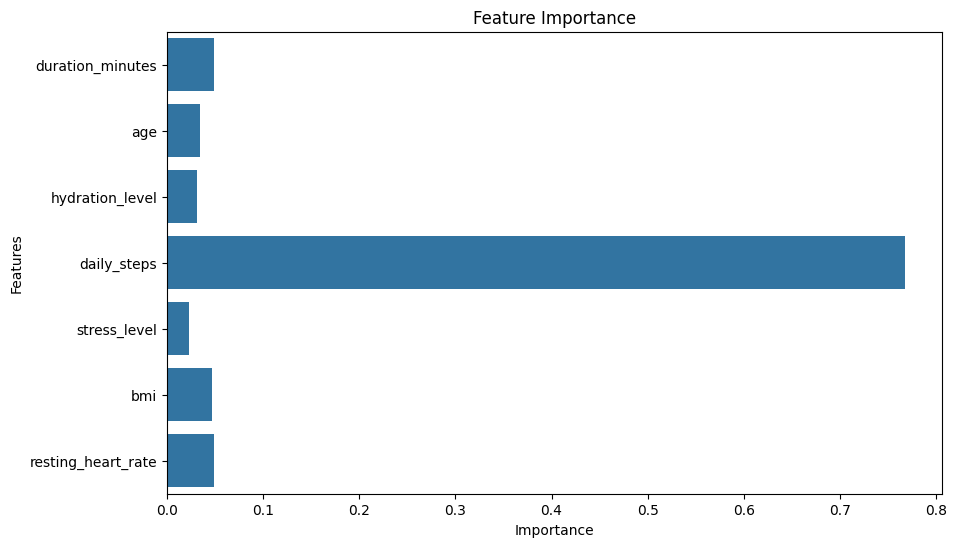

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('health_fitness_dataset.csv')

# Data Preprocessing
df = df.dropna()  # Drop missing values

# Encode Categorical Variables
df = pd.get_dummies(df, columns=['gender', 'activity_type', 'intensity'], drop_first=True)

# Sample the Data (Use 30% of the dataset for faster tuning)
df_sample = df.sample(frac=0.3, random_state=42)

# Feature Selection
X = df_sample[['duration_minutes', 'age', 'hydration_level', 'daily_steps',
               'stress_level', 'bmi', 'resting_heart_rate']]
y = df_sample['fitness_level']

# Feature Scaling (Optional)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
model = RandomForestRegressor(random_state=42)

# Define Reduced Hyperparameter Distribution
param_dist = {
    'n_estimators': [10, 50, 100],  # Smaller values for faster tuning
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Randomized Search with Fewer Iterations
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,  # Reduce number of combinations
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Perform Randomized Search
random_search.fit(X_train, y_train)

# Display Best Parameters
print(f"Best Parameters: {random_search.best_params_}")

# Evaluate the Best Model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performance Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Feature Importance Visualization
feature_importances = best_model.feature_importances_
features = ['duration_minutes', 'age', 'hydration_level', 'daily_steps',
            'stress_level', 'bmi', 'resting_heart_rate']

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [8]:
# Use the full dataset (not the sample)
X_full = df[['duration_minutes', 'age', 'hydration_level', 'daily_steps',
             'stress_level', 'bmi', 'resting_heart_rate']]
y_full = df['fitness_level']

# Scale Features
X_full = scaler.fit_transform(X_full)

# Train the Model with Best Parameters
final_model = RandomForestRegressor(
    n_estimators=random_search.best_params_['n_estimators'],
    max_depth=random_search.best_params_['max_depth'],
    min_samples_split=random_search.best_params_['min_samples_split'],
    min_samples_leaf=random_search.best_params_['min_samples_leaf'],
    random_state=42
)
final_model.fit(X_full, y_full)


RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [9]:
# Predictions on Test Data
y_test_pred = final_model.predict(X_test)

# Performance Metrics
rmse_final = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_final = r2_score(y_test, y_test_pred)

print(f"Final Model RMSE: {rmse_final}")
print(f"Final Model R² Score: {r2_final}")


Final Model RMSE: 4.77644650968458
Final Model R² Score: 0.2508898994001225


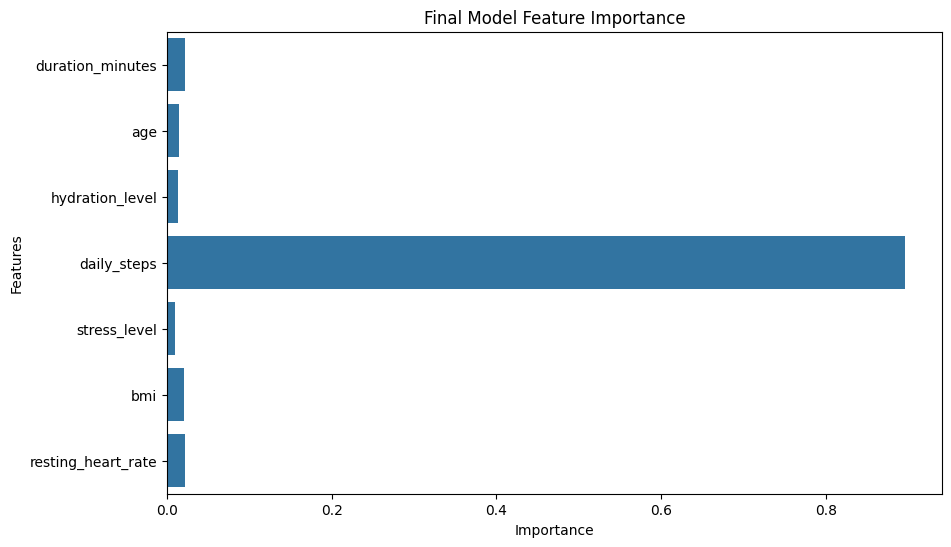

In [10]:
# Feature Importance
feature_importances_final = final_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_final, y=features)
plt.title("Final Model Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [11]:
# Example: Predict fitness level for new input data
new_data = np.array([[45, 25, 1.2, 10000, 3, 22, 70]])
new_data_scaled = scaler.transform(new_data)
predicted_fitness_level = final_model.predict(new_data_scaled)

print(f"Predicted Fitness Level: {predicted_fitness_level}")


Predicted Fitness Level: [7.14957026]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
import joblib

# Save the model
joblib.dump(final_model, 'final_fitness_model.pkl')

# Save the scaler if needed for preprocessing new data
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [13]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred))
r2_xgb = r2_score(y_test, xgb_pred)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R² Score: {r2_xgb}")


XGBoost RMSE: 4.9600368705556095
XGBoost R² Score: 0.19219669535388673
